In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [44]:
# Enable interactive mode
plt.ion()

# Load the CSV file
data = pd.read_csv('Exp_FC_TmpDpn_RD_0001_ref.csv')

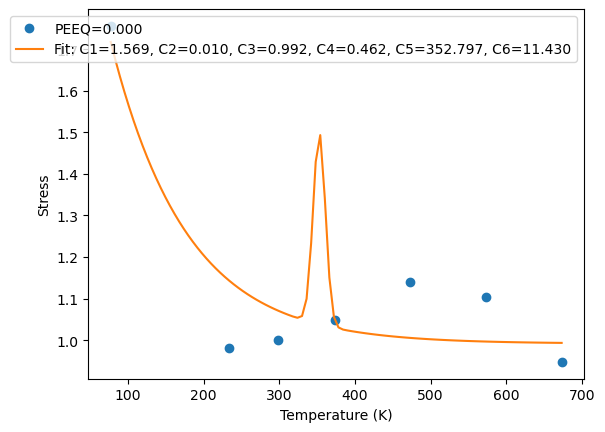

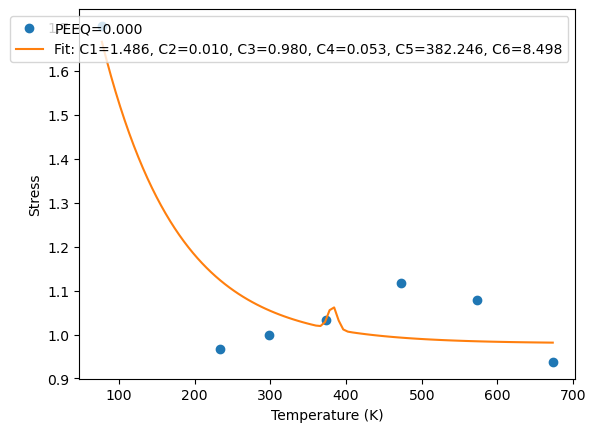

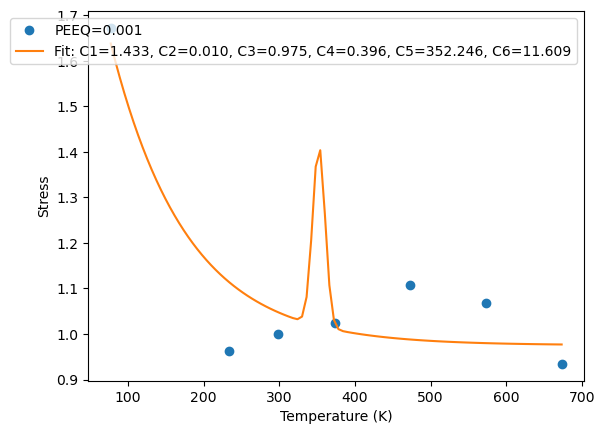

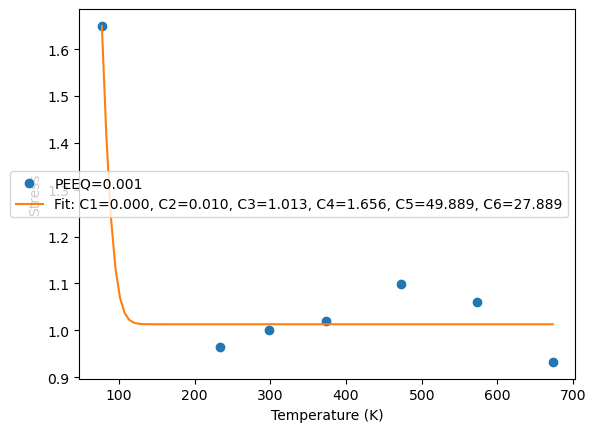

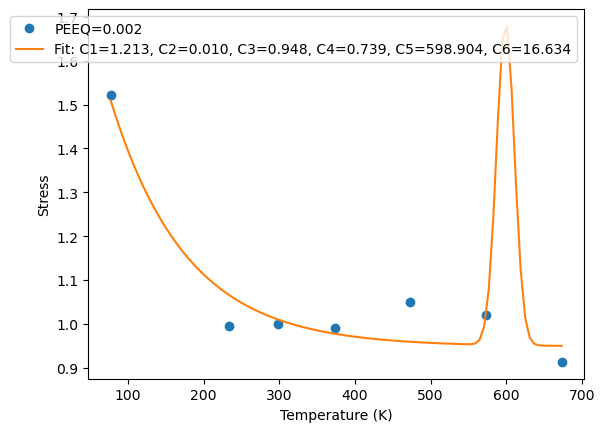

In [6]:

# Extract temperature and stress data
# Temperatures are fixed based on your example, adjust as needed
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# List of indices for the rows to process (based on your example)
indices = np.array([3, 4, 5, 6, 11])

# Define the function to fit
def f_func(T, C1, C2, C3, C4, C5, C6):
    return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

# Dictionary to store the parameters
p = {}

# Loop through specified rows and perform fitting
for i in indices:
    # Extract stress data from row `i`, starting from the 9th column to the end
    stress = data.iloc[i, 8:].values
    
    # Perform the curve fitting
    initial_guess = [1, 0.001, 0.5, 1, 300, 100]  # Initial guesses for C1 to C6
    bounds = ([0, 0, -np.inf, 0, 0, 1], [10, 0.01, np.inf, 10, 1000, 500])  # Set bounds
    
    try:
        params, _ = curve_fit(f_func, T, stress, p0=initial_guess, bounds=bounds)
    except RuntimeError:
        print(f"Could not fit row {i}")
        continue
    
    # Store the fitted parameters for this row
    p[f"fit{i}"] = params
    
    # Generate data for the fit curve
    T_fit = np.linspace(min(T), max(T), 100)
    stress_fit = f_func(T_fit, *params)
    
    # Plot the original data and the fitted curve
    plt.plot(T, stress, 'o', label='Data')
    plt.plot(T_fit, stress_fit, '-', label='Fit')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Stress')
    plt.legend([f'PEEQ={data.iloc[i, 0]:.3f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}'])
    plt.show()

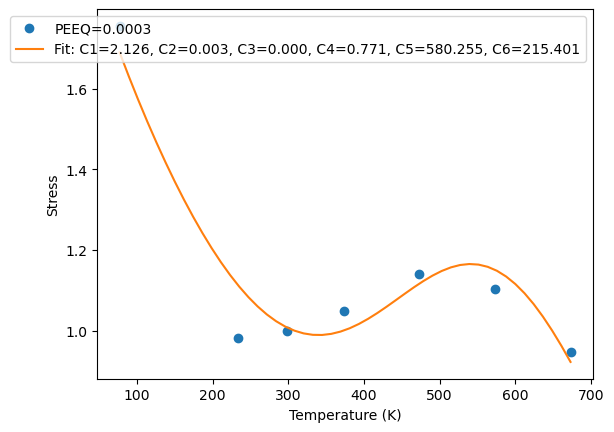

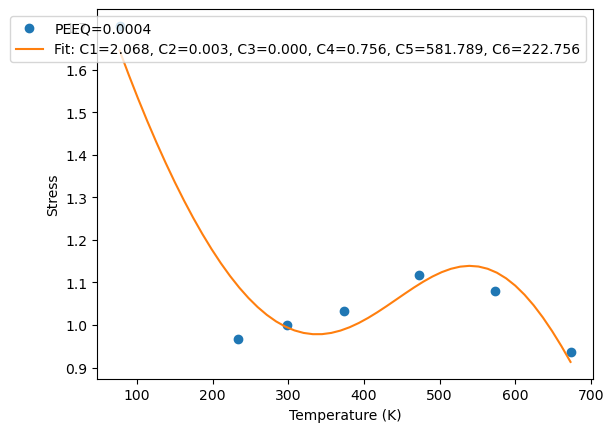

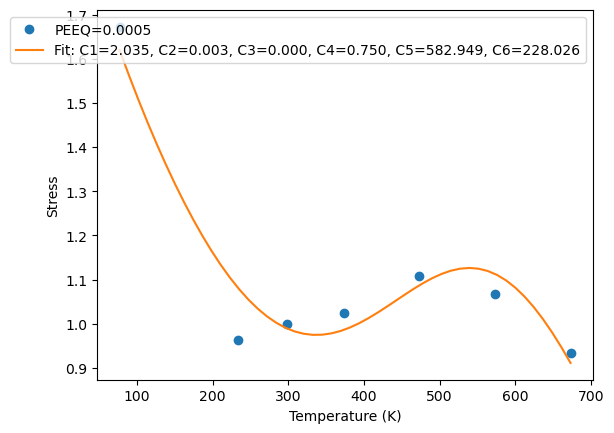

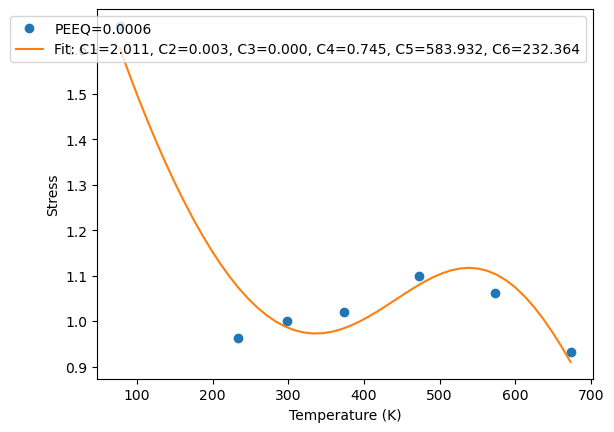

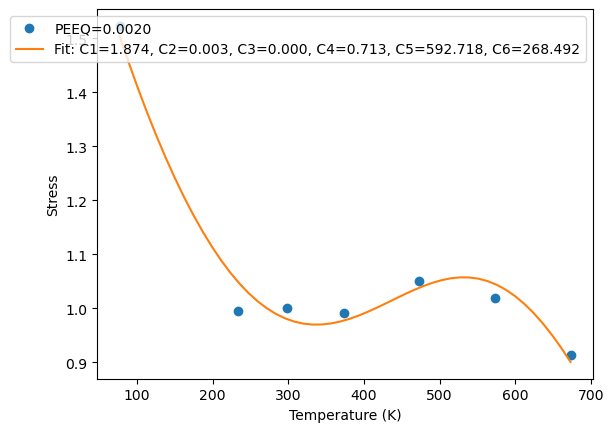

In [18]:
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function to fit
def f_func(T, C1, C2, C3, C4, C5, C6):
    return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

# List of indices for the rows to process
indices = np.array([3, 4, 5, 6, 11])

# Dictionary to store fitted parameters
p = {}

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 9th column to the end
        stress = data.iloc[i, 8:].values
        
        # Provide initial guesses and bounds
        initial_guess = [1, 0.001, 0.5, 1, 300, 100]
        bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
        
        # Perform the curve fitting
        try:
            params, _ = curve_fit(f_func, T, stress, p0=initial_guess, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Store the fitted parameters for this row
        p[f"fit{i}"] = params
        
        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 50)
        stress_fit = f_func(T_fit, *params)
        
        # Plot the original data and the fitted curve
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.legend([f'PEEQ={data.iloc[i, 0]:.4f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}'])
        plt.show()

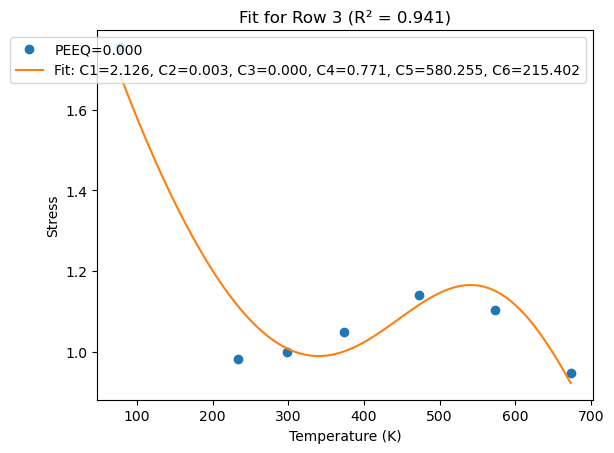

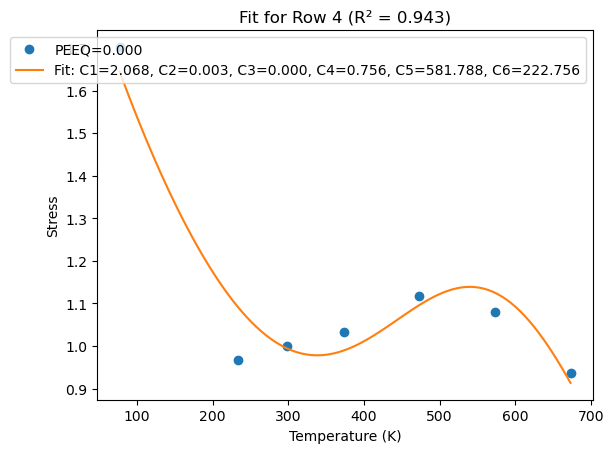

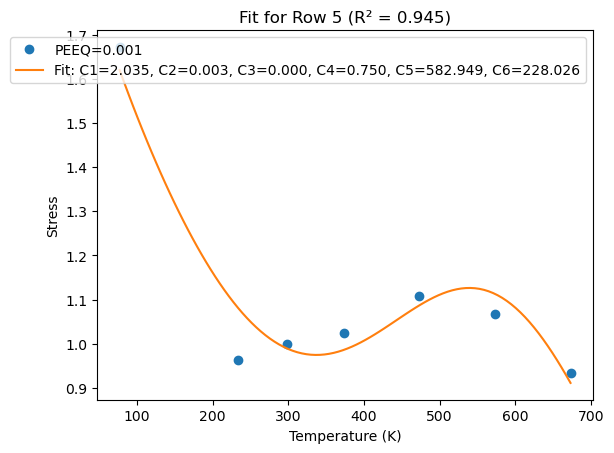

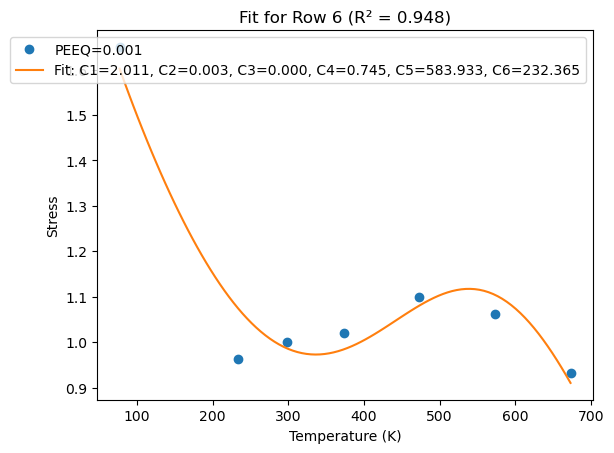

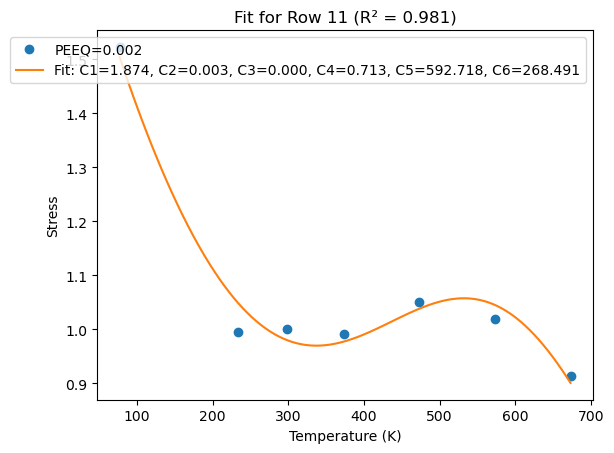

In [23]:
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Refined function for fitting
def improved_func(T, C1, C2, C3, C4, C5, C6):
    return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

# List of indices for the rows to process
indices = np.array([3, 4, 5, 6, 11])

# Dictionary to store fitted parameters
p = {}

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 9th column to the end
        stress = data.iloc[i, 8:].values
        
        # Refined initial guesses and bounds based on data patterns
        initial_guess = [1, 0.001, 0.5, 1, 400, 100]
        bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
        
        # Perform the curve fitting
        try:
            params, _ = curve_fit(improved_func, T, stress, p0=initial_guess, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Store the fitted parameters for this row
        p[f"fit{i}"] = params
        
        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = improved_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - improved_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([f'PEEQ={data.iloc[i, 0]:.3f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}'])
        plt.show()
    else:
        str(0)

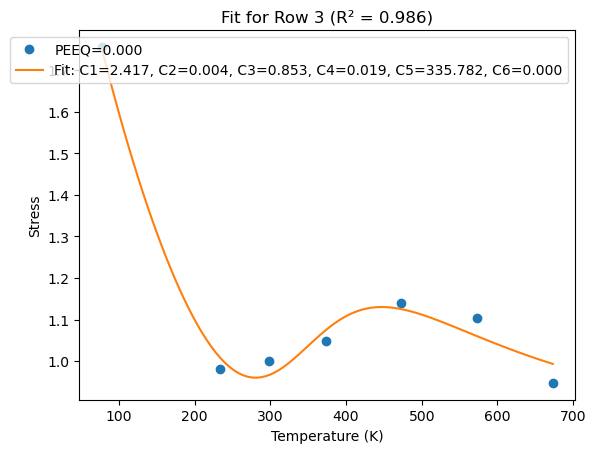

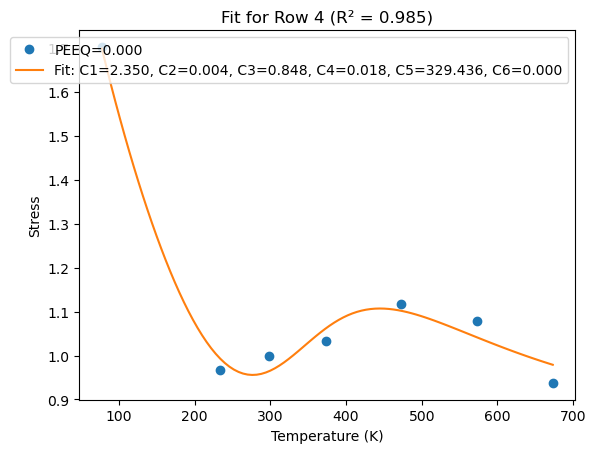

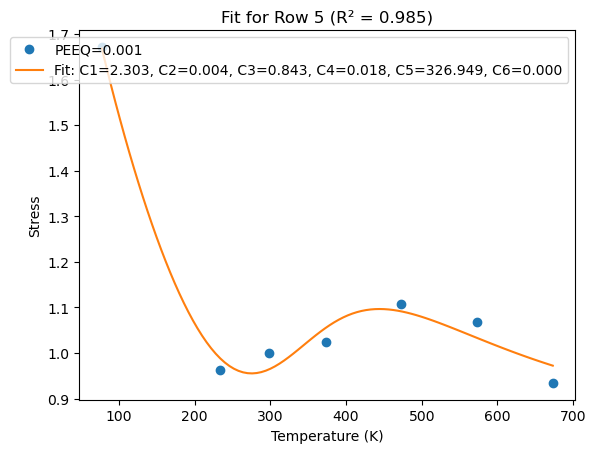

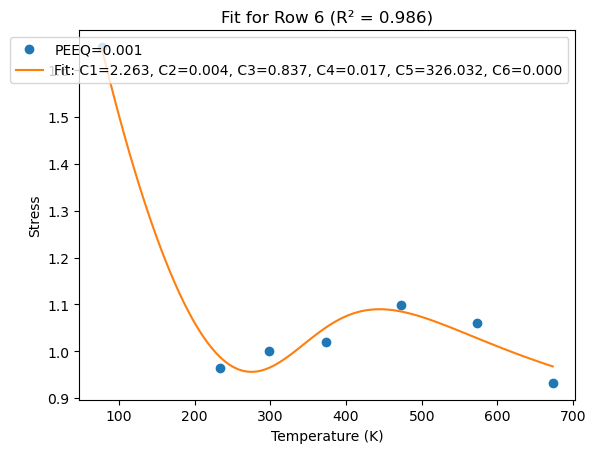

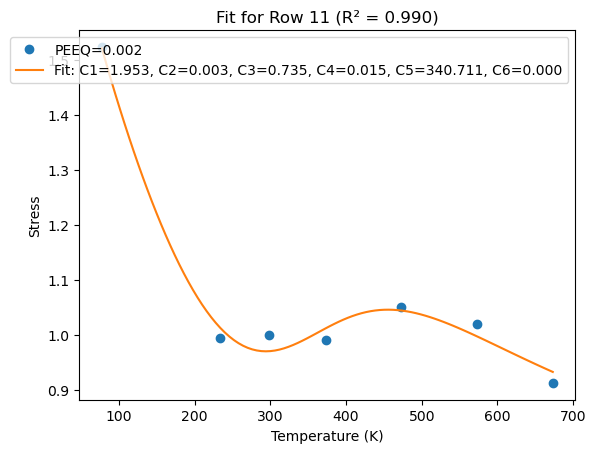

In [35]:
# Temperature data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the improved function with exponential decay and logistic growth
def logistic_exponential_func(T, C1, C2, C3, C4, C5, C6):
    return C1 * np.exp(-C2 * T) + C3 / (1 + np.exp(-C4 * (T - C5))) + C6

# List of indices for the rows to process
indices = np.array([3, 4, 5, 6, 11])

# Dictionary to store fitted parameters
p = {}

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 9th column to the end
        stress = data.iloc[i, 8:].values
        
        # Initial guesses and bounds for the logistic-exponential function
        initial_guess = [1, 0.001, 1, 0.01, 400, np.mean(stress)]
        bounds = ([0, 0.00001, 0, 0.00001, 200, 0], [10, 0.01, 10, 0.1, 700, 2 * np.mean(stress)])
        
        # Perform the curve fitting
        try:
            params, _ = curve_fit(logistic_exponential_func, T, stress, p0=initial_guess, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Store the fitted parameters for this row
        p[f"fit{i}"] = params
        
        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = logistic_exponential_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - logistic_exponential_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([f'PEEQ={data.iloc[i, 0]:.3f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}'])
        plt.show()

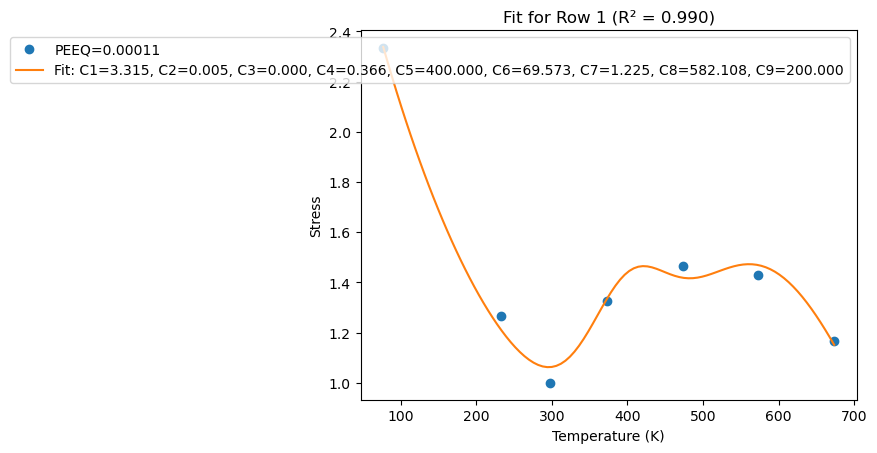

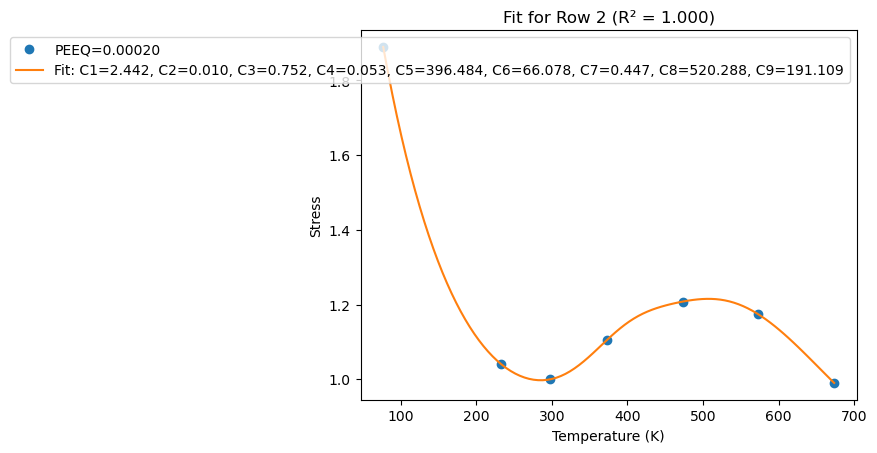

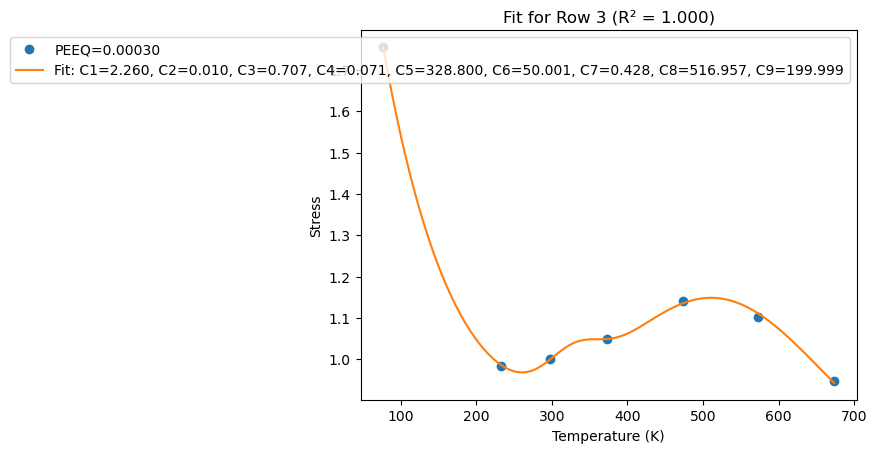

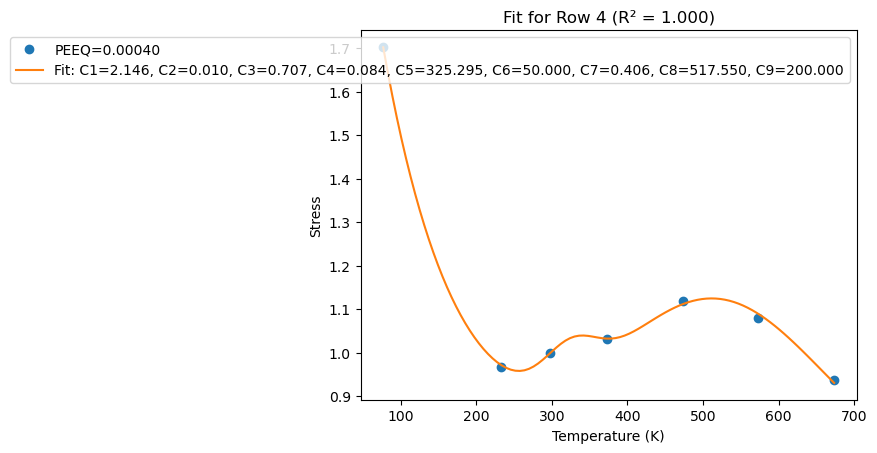

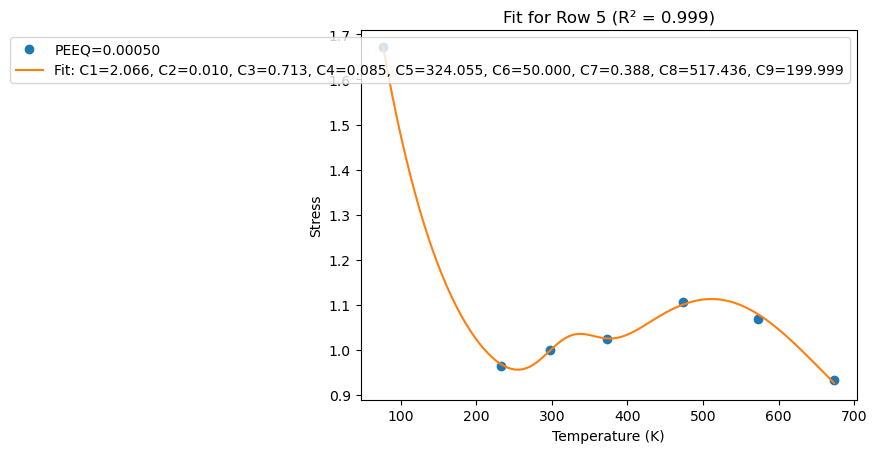

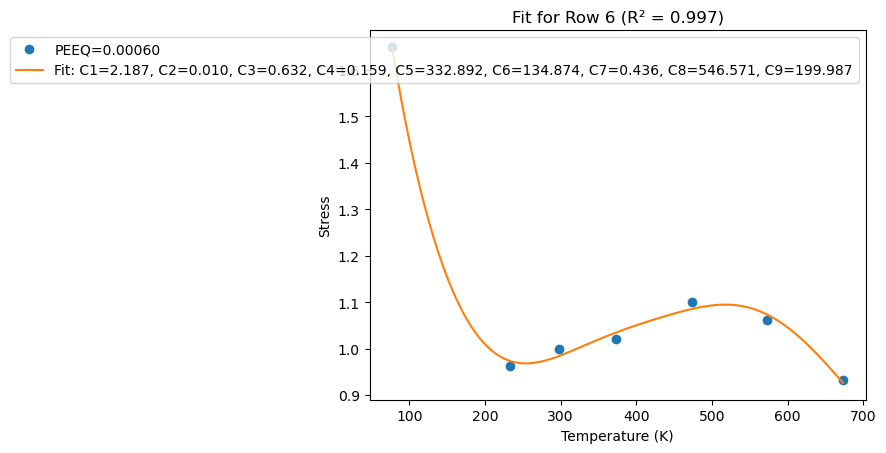

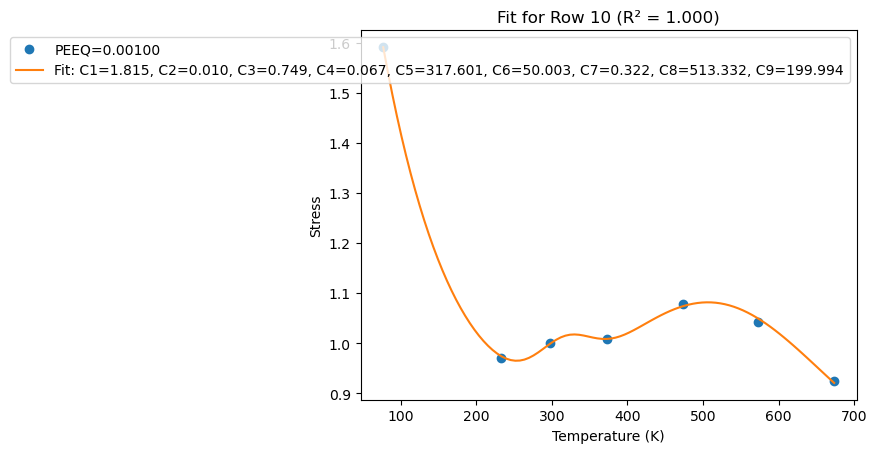

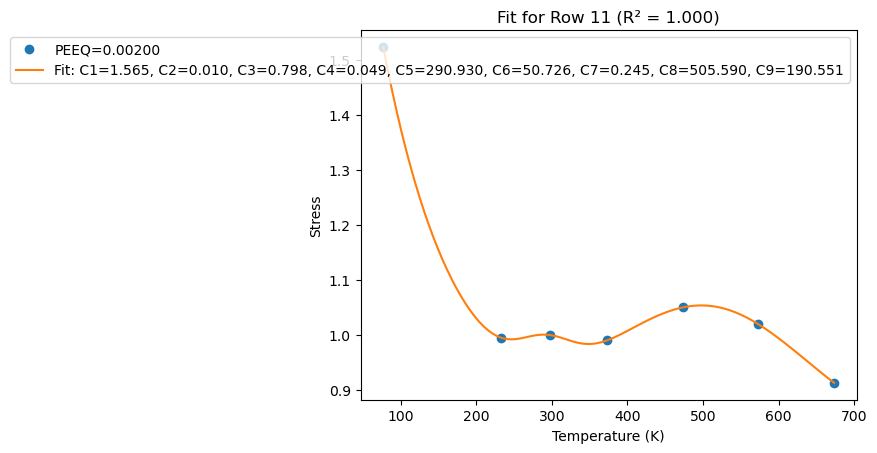

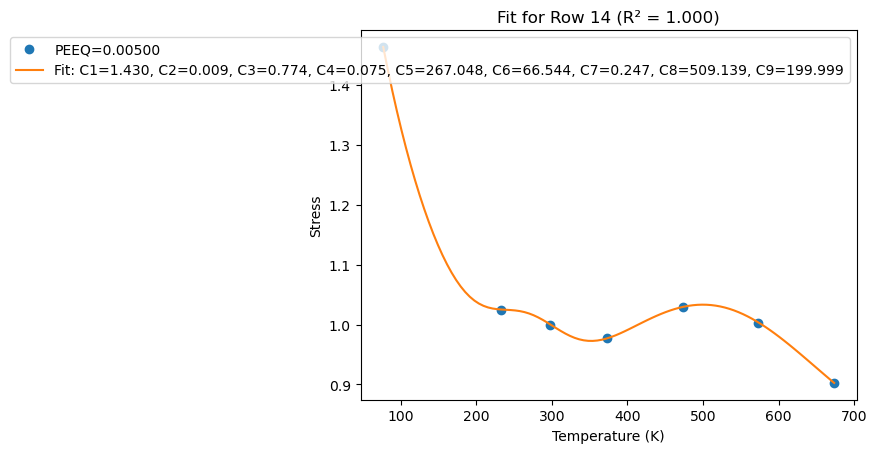

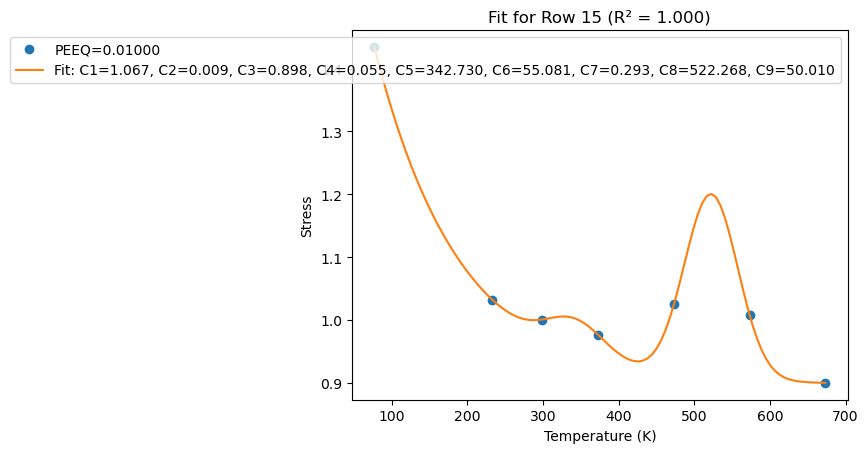

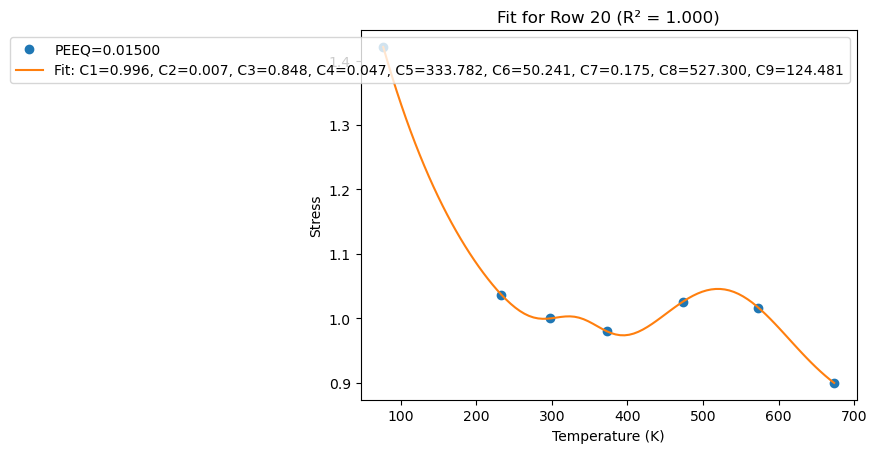

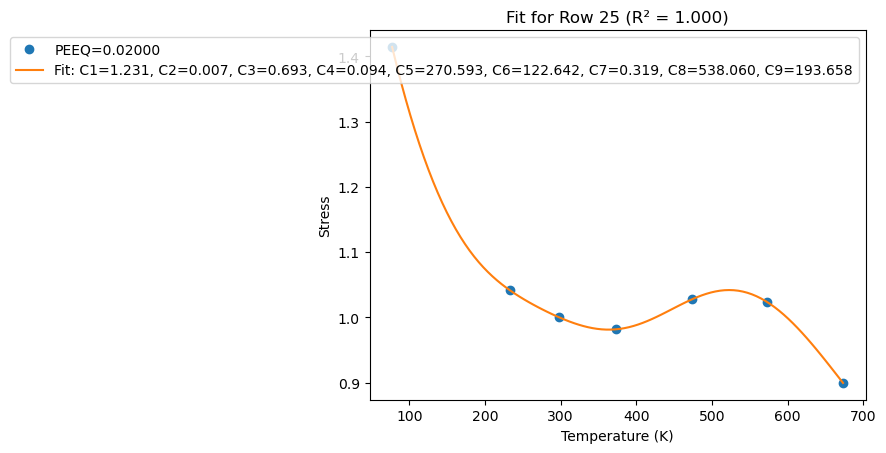

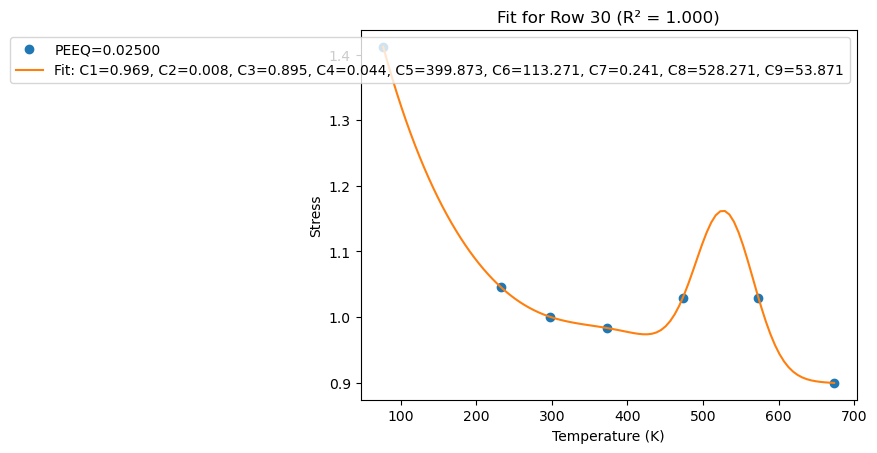

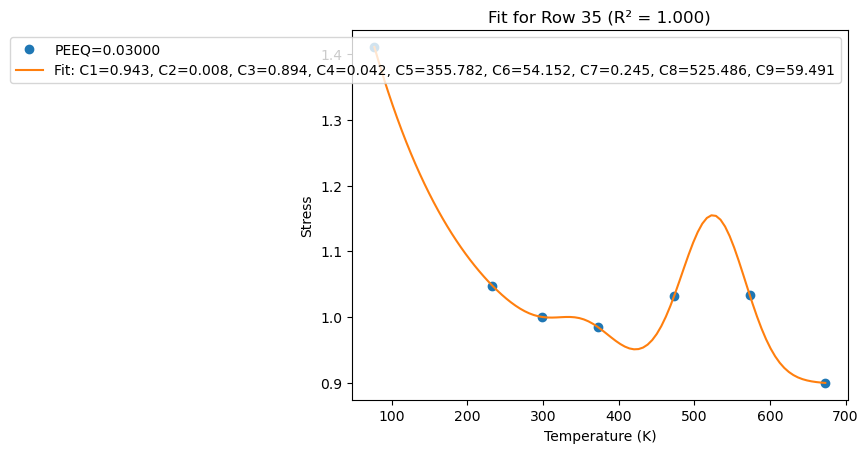

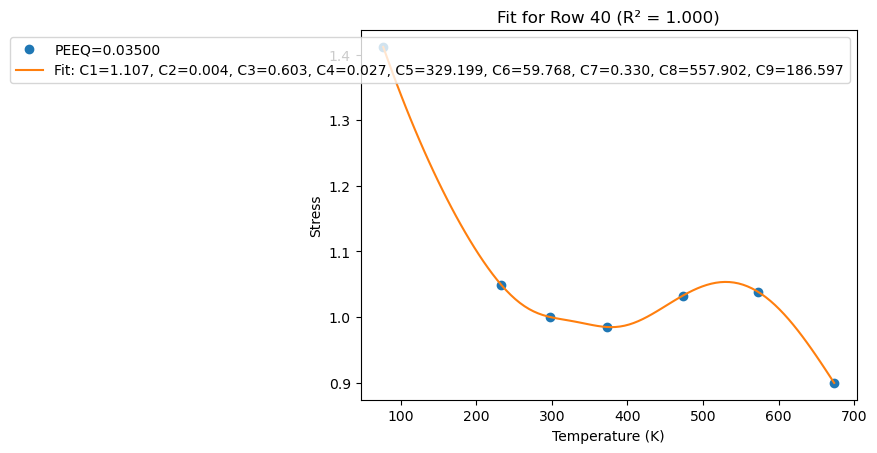

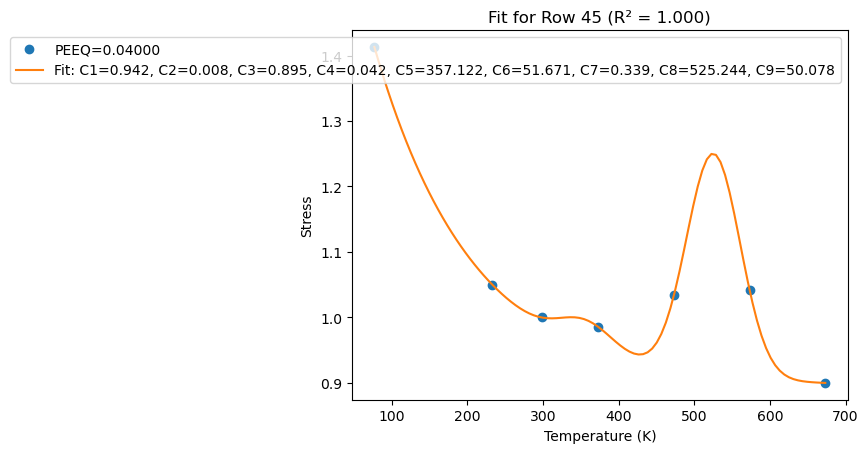

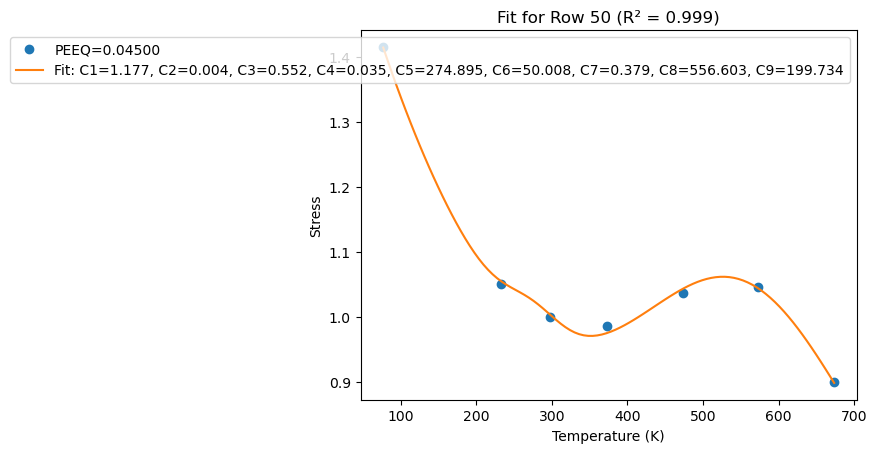

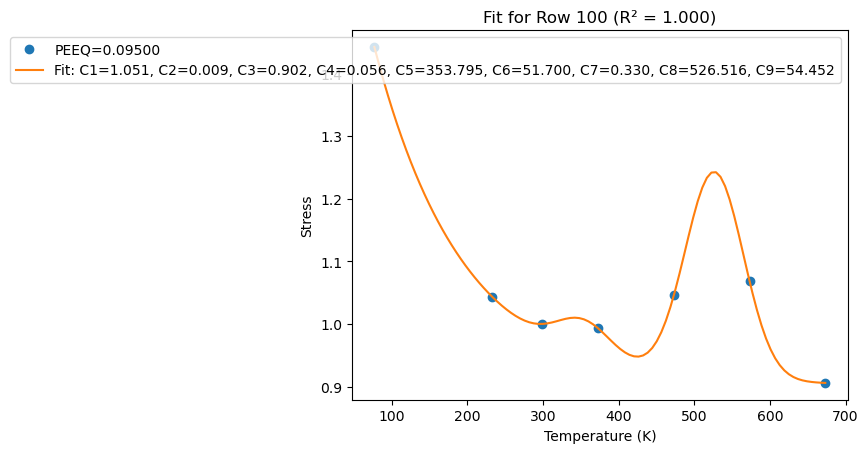

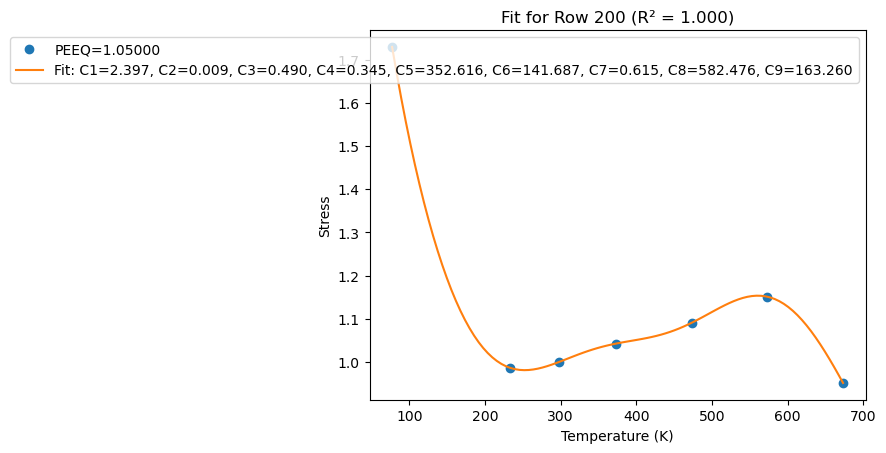

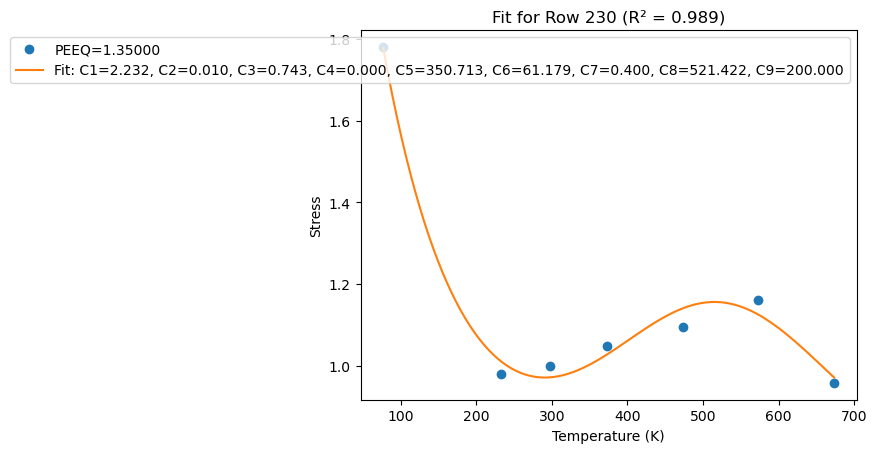

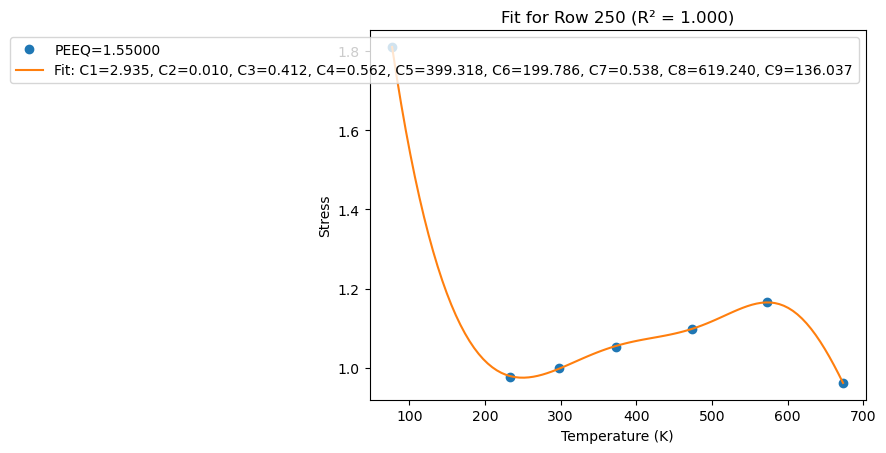

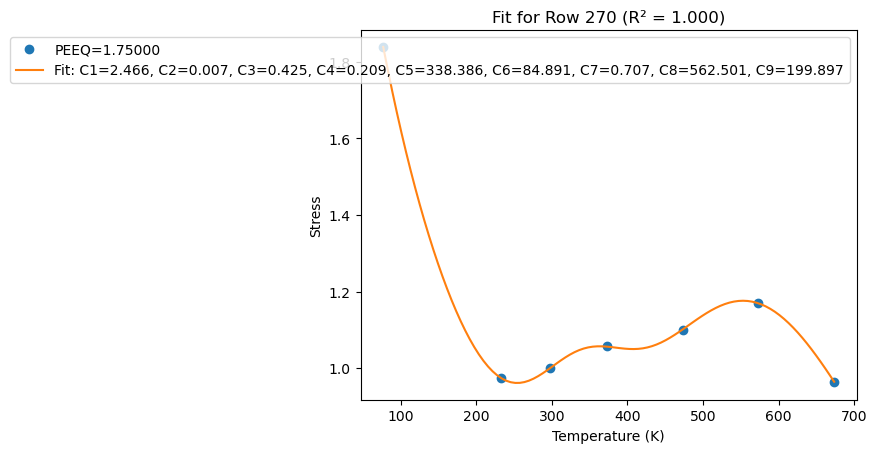

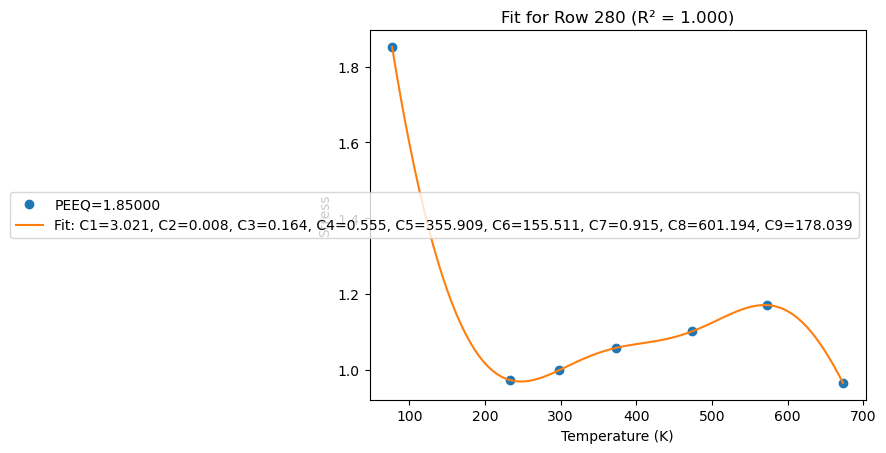

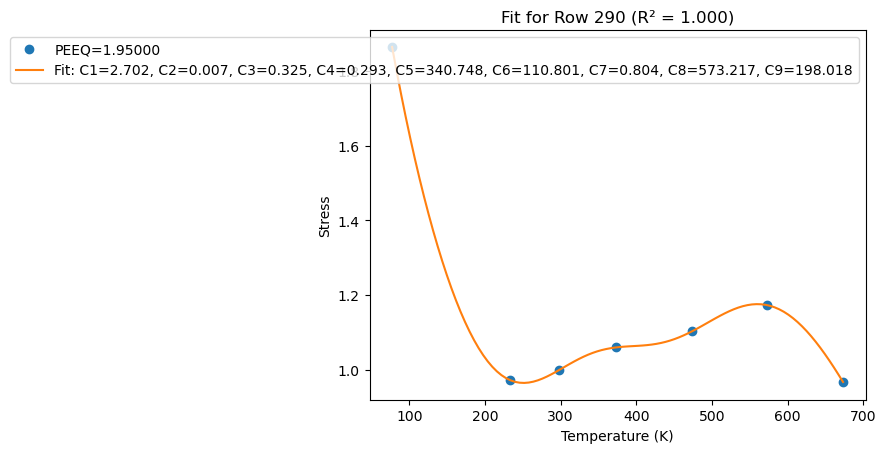

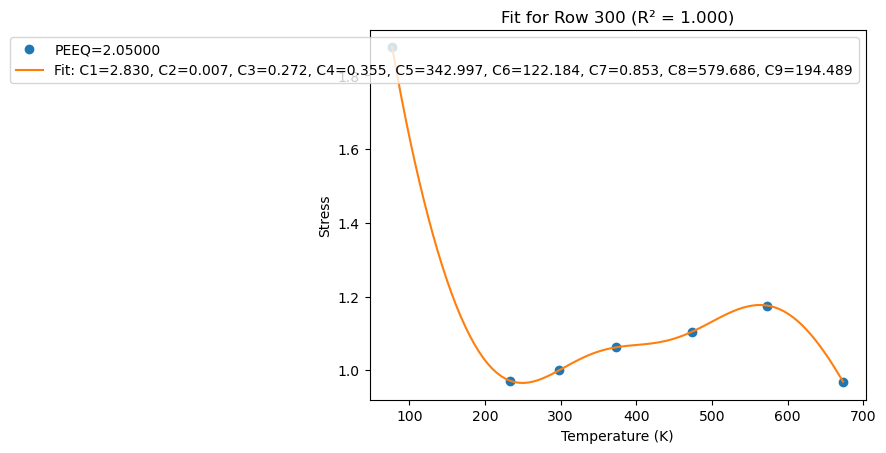

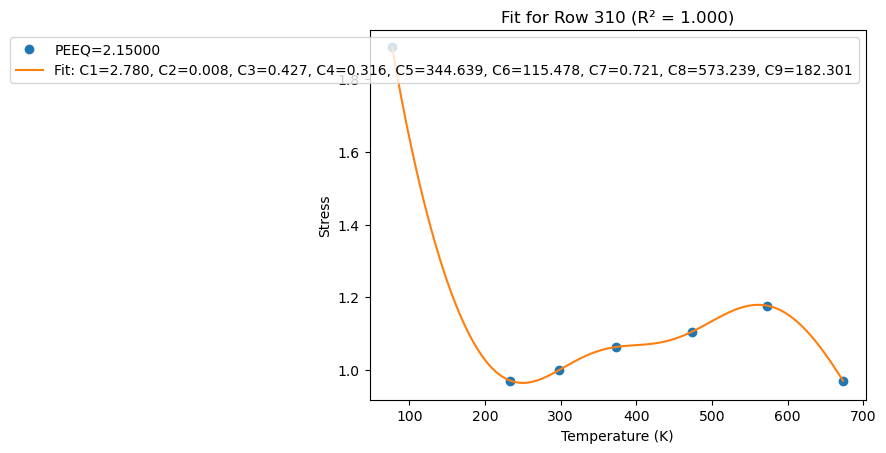

In [46]:
# Temperature data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

# List of indices for the rows to process
indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])

# Dictionary to store fitted parameters
p = {}

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 9th column to the end
        stress = data.iloc[i, 8:].values
        
        # Initial guesses and bounds for double Gaussian function
        initial_guess = [1, 0.001, 0.5, 0.5, 300, 100, 0.5, 500, 100]
        bounds = ([0, 0.00001, 0, 0, 200, 50, 0, 400, 50], [10, 0.01, 10, 5, 400, 200, 5, 700, 200])
        
        # Perform the curve fitting
        try:
            params, _ = curve_fit(double_gaussian_func, T, stress, p0=initial_guess, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Store the fitted parameters for this row
        p[f"fit{i}"] = params
        
        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = double_gaussian_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - double_gaussian_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([f'PEEQ={data.iloc[i, 0]:.5f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}, C7={params[6]:.3f}, C8={params[7]:.3f}, C9={params[8]:.3f}'])
        plt.show()

In [47]:
# Enable interactive mode
plt.ion()

# Load the CSV file
data = pd.read_csv('Fitted_FC_TK_RD_Zinan.csv')

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


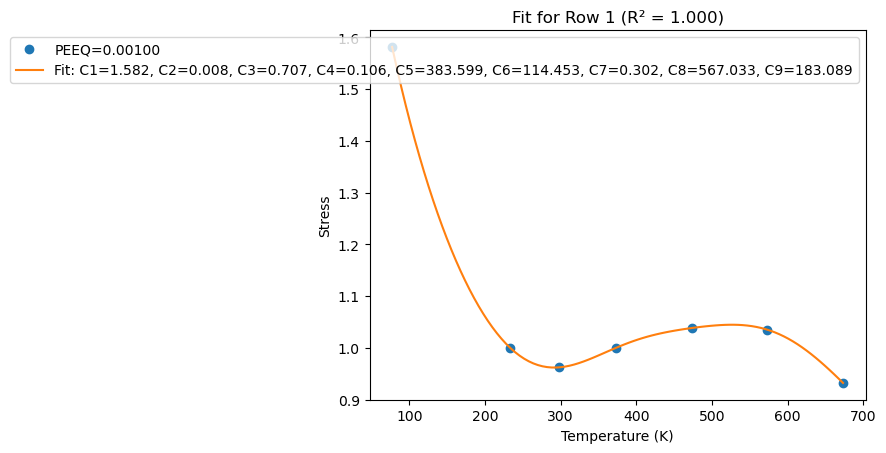

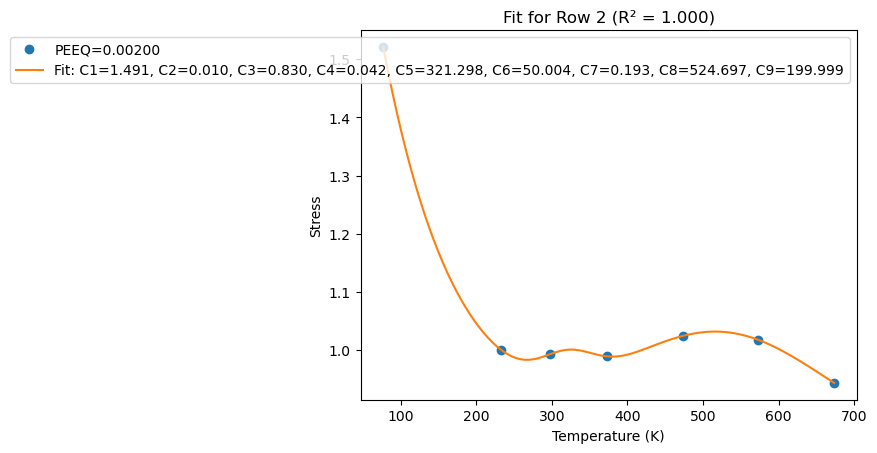

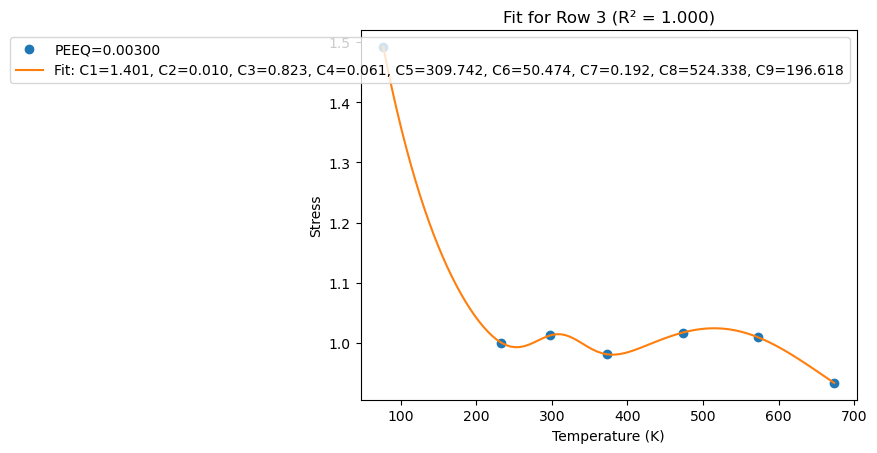

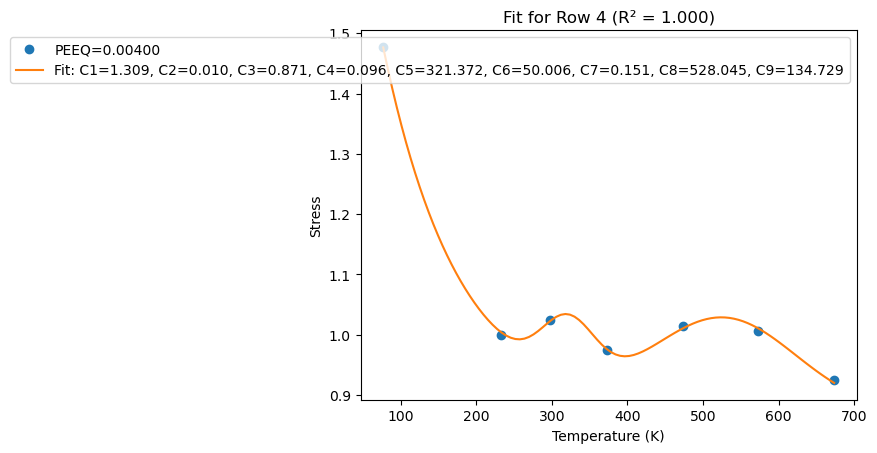

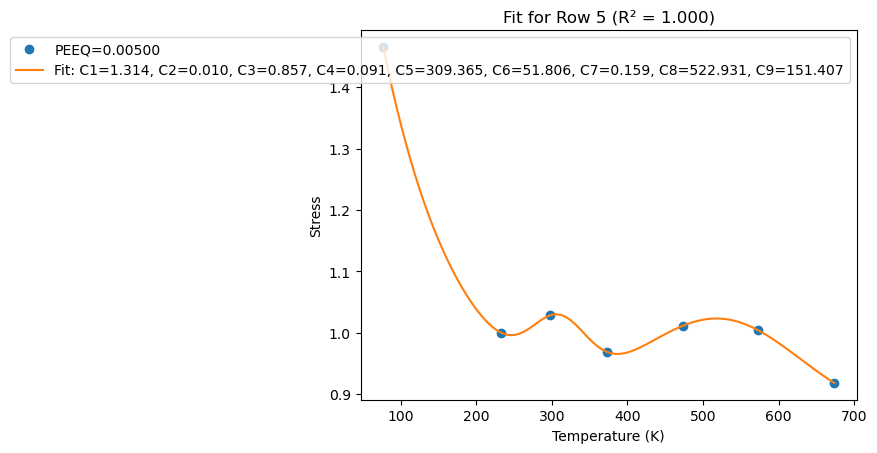

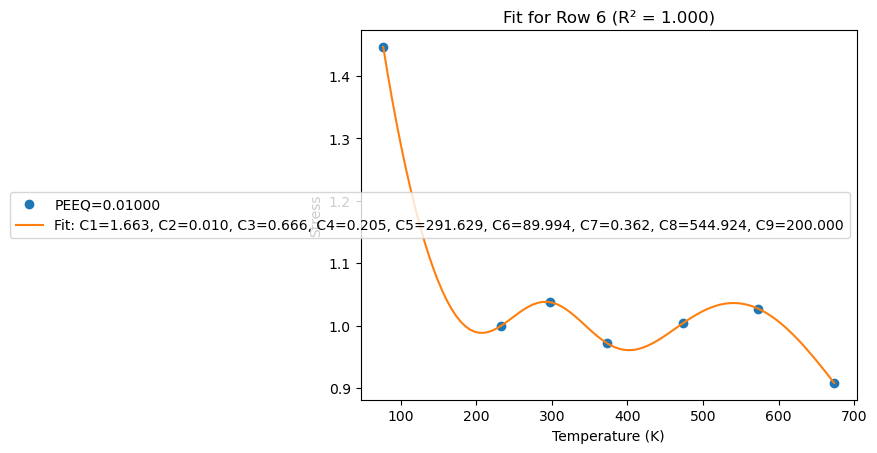

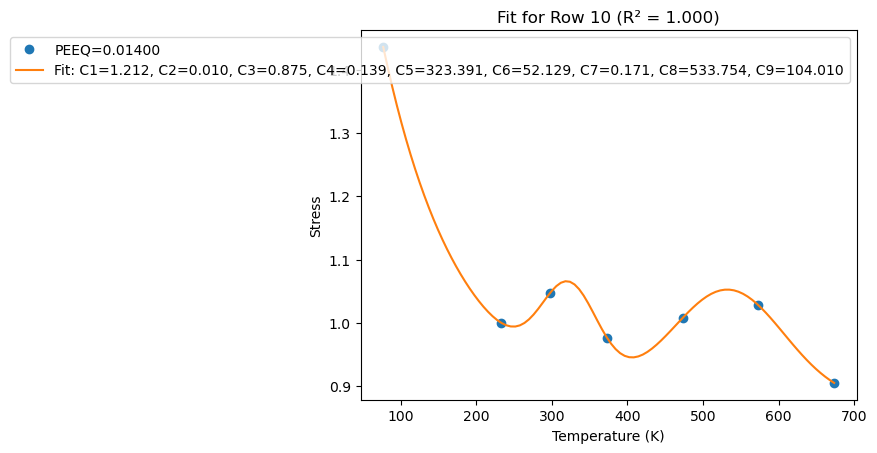

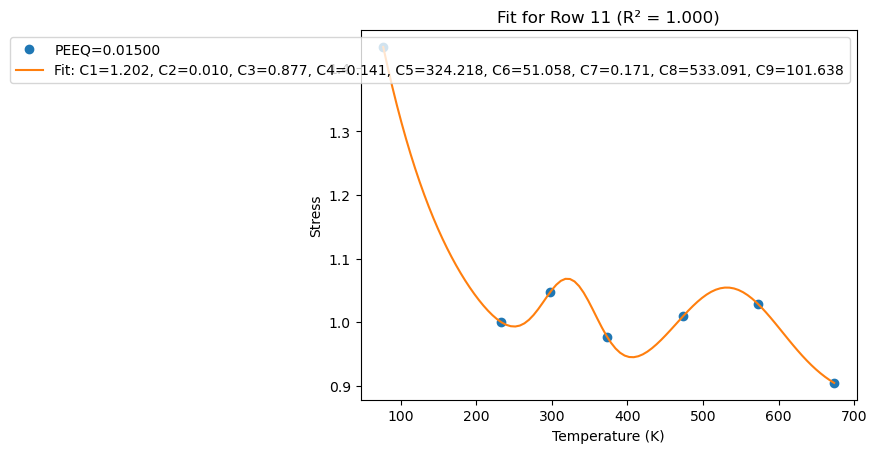

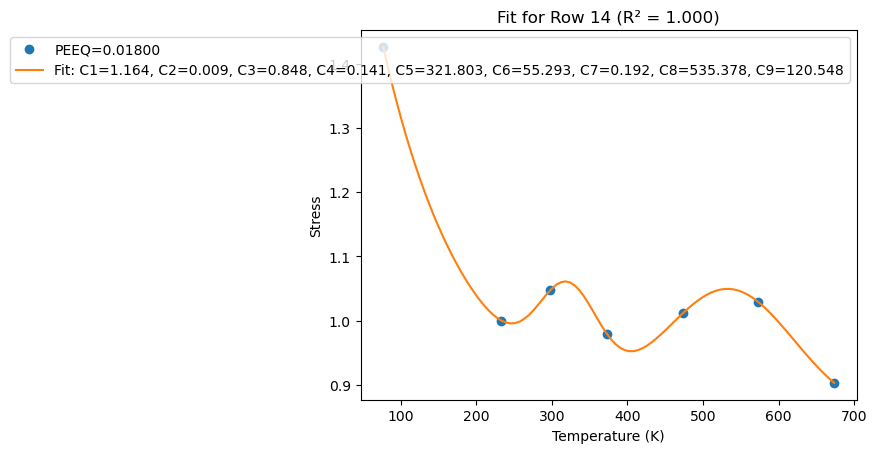

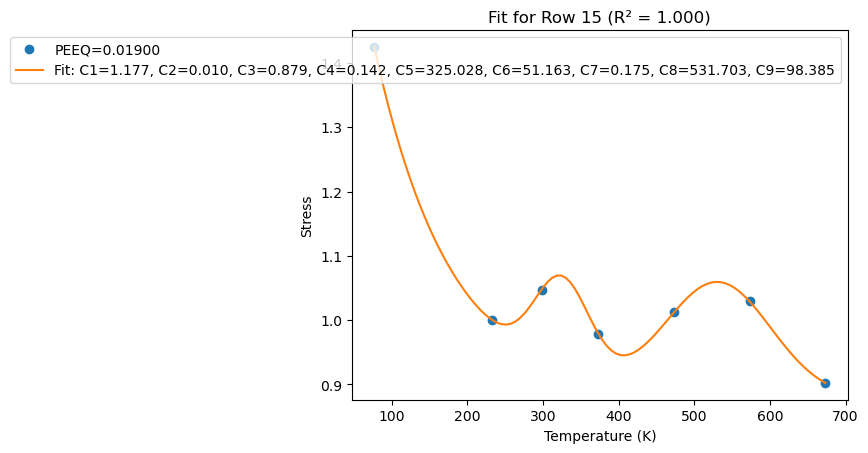

Could not fit row 20


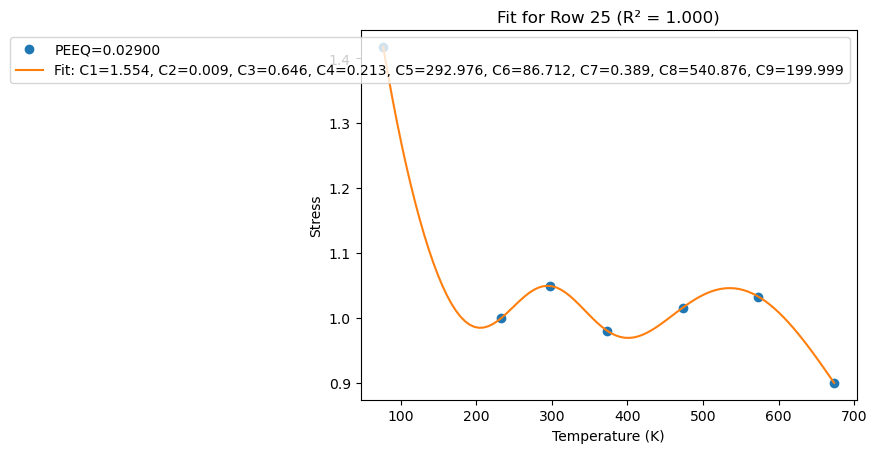

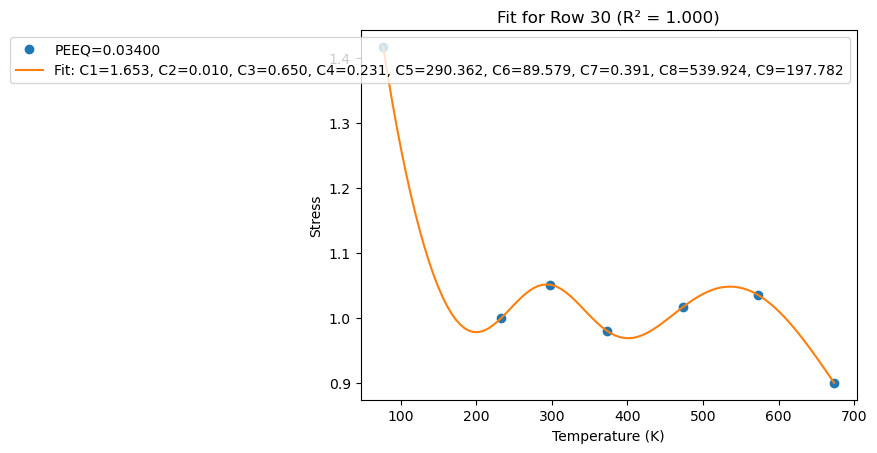

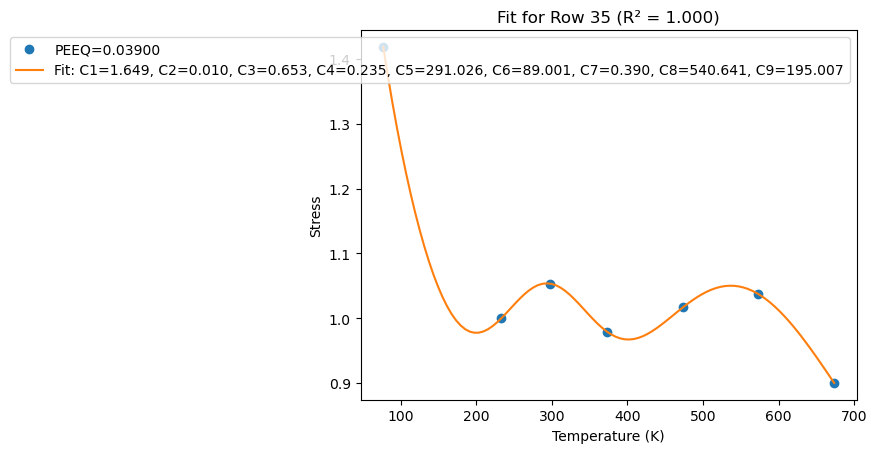

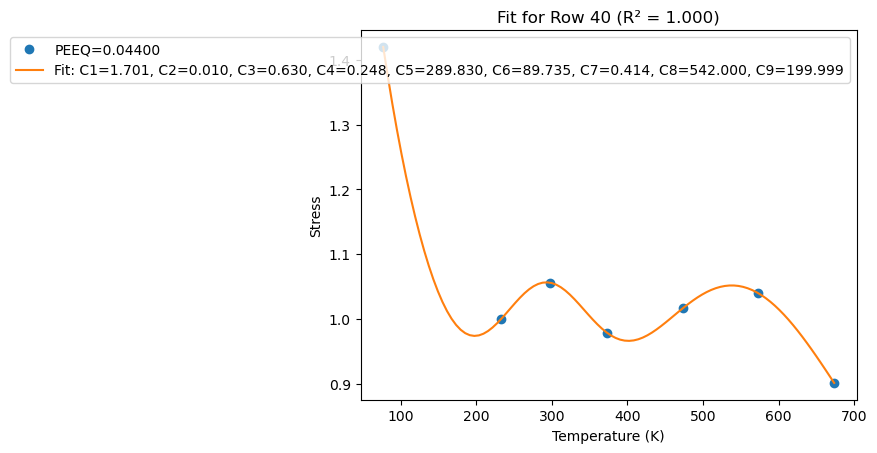

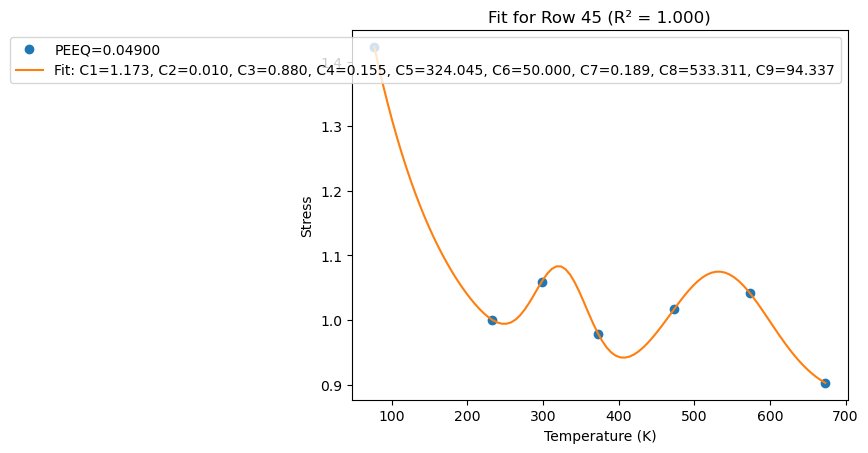

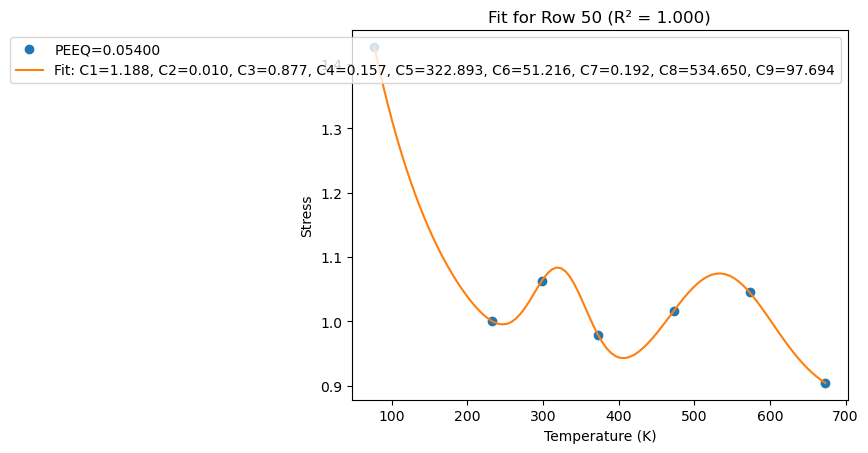

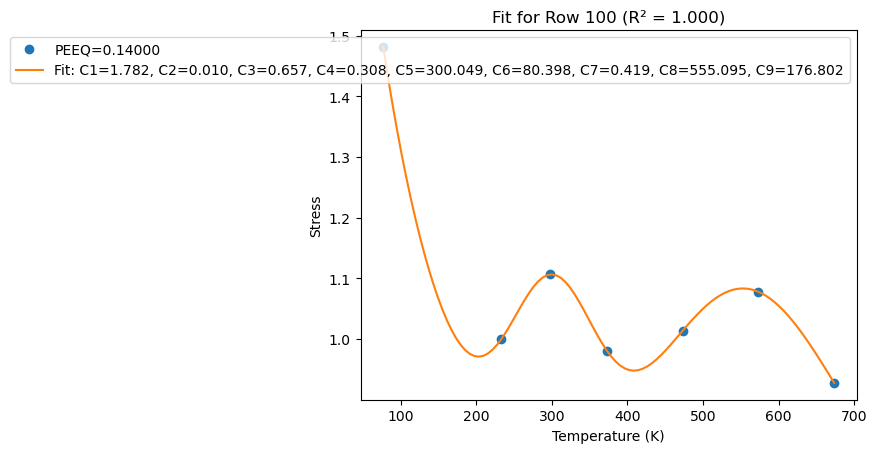

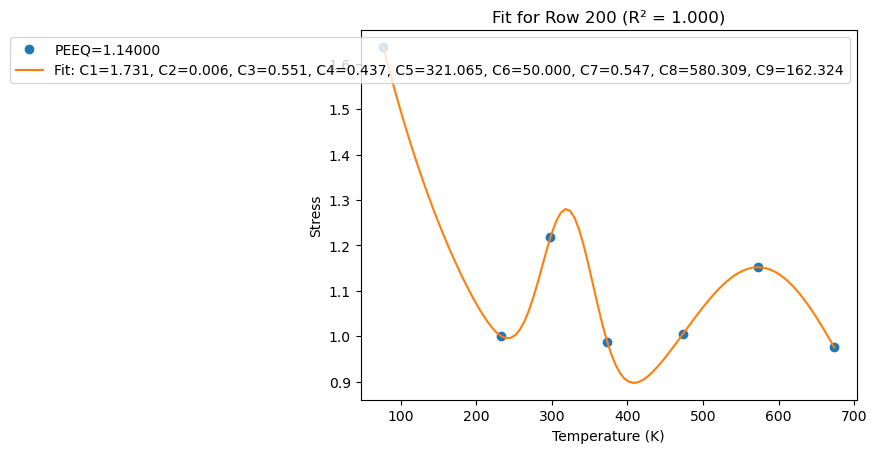

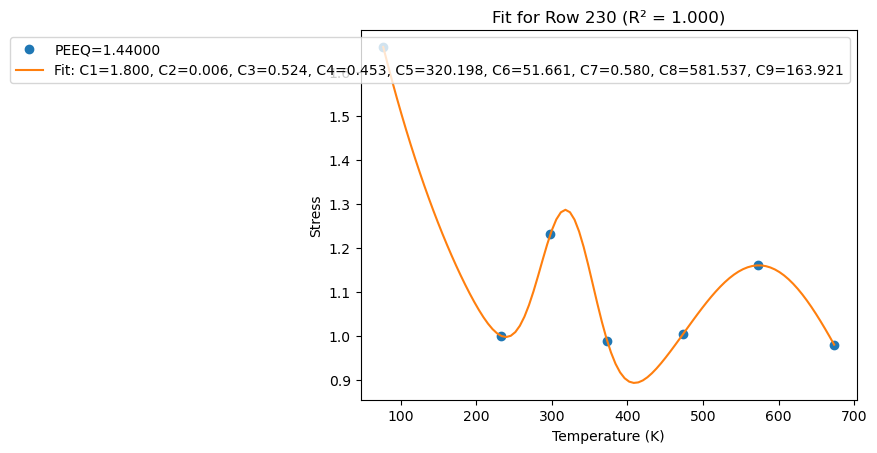

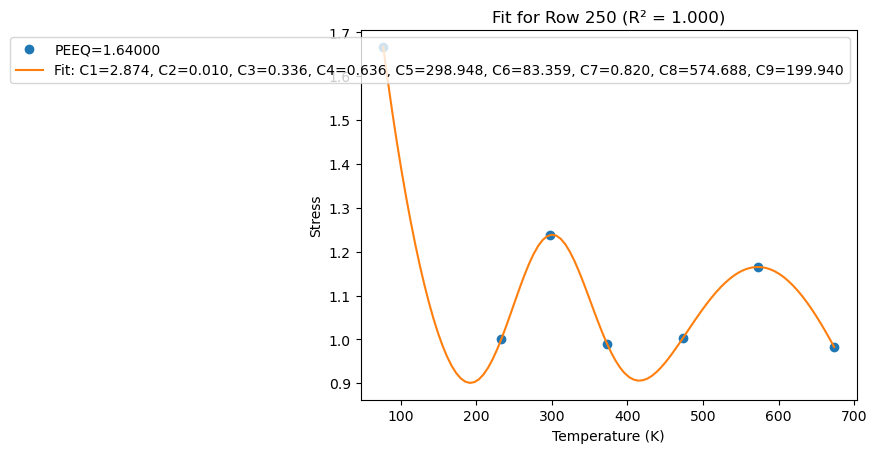

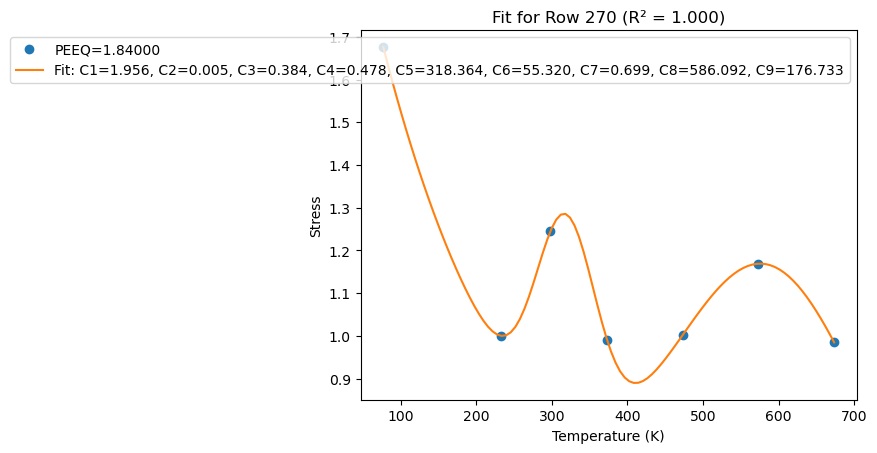

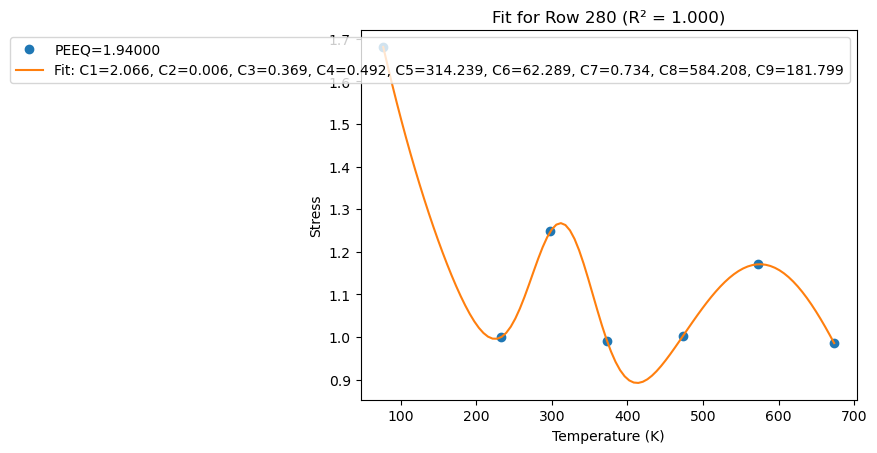

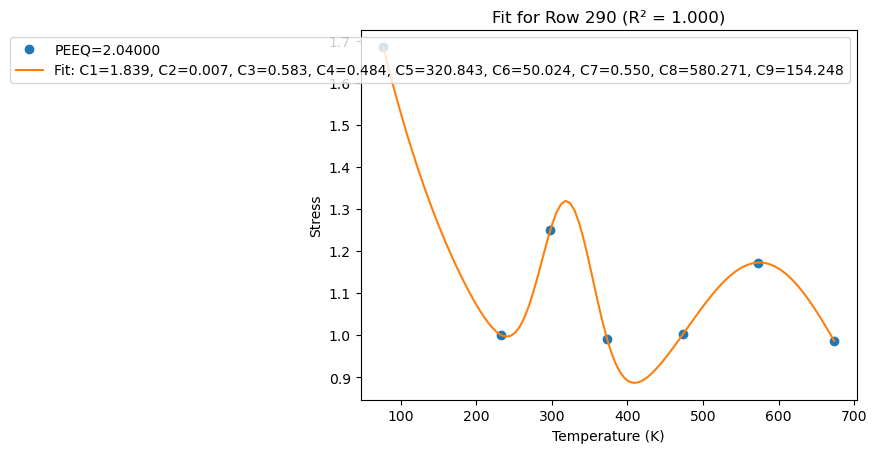

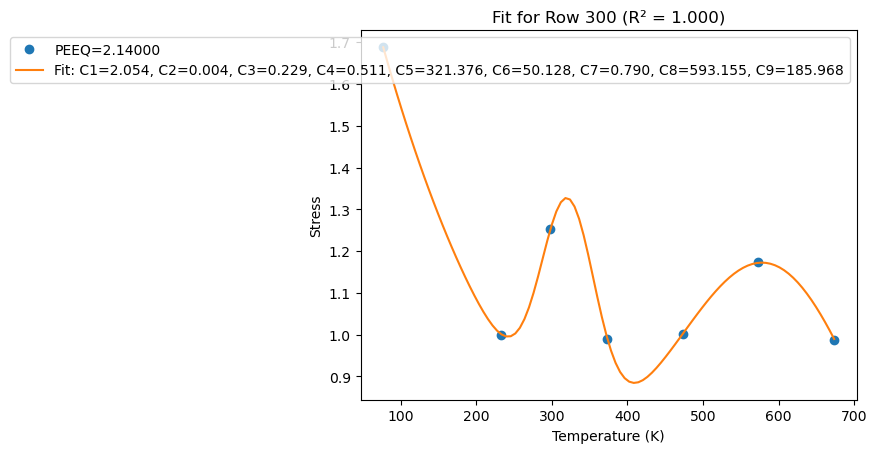

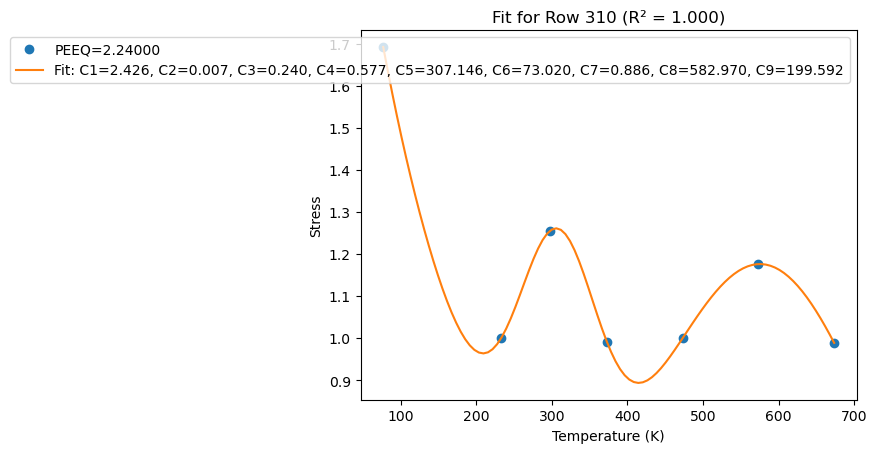

In [49]:
# Temperature data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

# List of indices for the rows to process
indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])

# Dictionary to store fitted parameters
p = {}

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 9th column to the end
        stress = data.iloc[i, 8:].values
        
        # Initial guesses and bounds for double Gaussian function
        initial_guess = [1, 0.001, 0.5, 0.5, 300, 100, 0.5, 500, 100]
        bounds = ([0, 0.00001, 0, 0, 200, 50, 0, 400, 50], [10, 0.01, 10, 5, 400, 200, 5, 700, 200])
        
        # Perform the curve fitting
        try:
            params, _ = curve_fit(double_gaussian_func, T, stress, p0=initial_guess, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Store the fitted parameters for this row
        p[f"fit{i}"] = params
        
        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = double_gaussian_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - double_gaussian_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([f'PEEQ={data.iloc[i, 0]:.5f}', f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f}, C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}, C7={params[6]:.3f}, C8={params[7]:.3f}, C9={params[8]:.3f}'])
        plt.show()